In [118]:
import numpy as np 
import matplotlib.pyplot as plt
import PIL.Image as Image
from scipy.stats import norm

In [175]:
FILEFOLDER = './LogFiles'
FILENAME = 'test_1.txt'
IMAGE_FILENAME = 'test_1_path.png' # test_1_path, horizontal, vertical

filepath = f'{FILEFOLDER}/{FILENAME}'
history = {}

with open(filepath, 'r') as f:
    lines = f.readlines()

for line in lines:
    header = line.split(',')[0][4:]
    if not header in history:
        history[header] = [line[10:-4]]
    else:
        history[header].append(line[10:-4])

history.keys()

dict_keys(['GPGLL', '', 'GPRMC', 'GCROT', 'CCHPR', 'PXTB', 'DYSIG', 'CCAPM'])

In [176]:

gps_data = history['GPRMC']
sig_data = history['DYSIG']

sig_data = np.array([float(i) for i in sig_data])


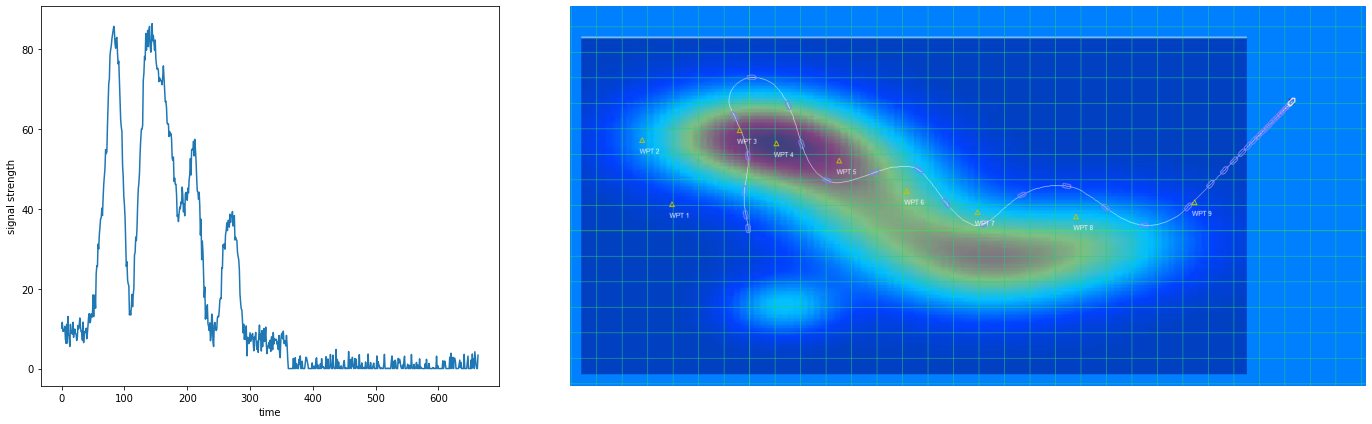

In [177]:
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
f.set_size_inches(20, 6)

a0.plot(sig_data)
a0.set_ylabel('signal strength')
a0.set_xlabel('time')

image = np.asarray(Image.open(f'LogImages/{IMAGE_FILENAME}'))
a1.imshow(image)
a1.axis('off')

f.tight_layout()


mean: 8.527153284671533, std: 10.515235311111047


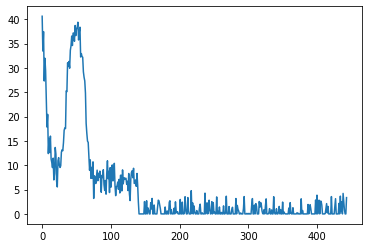

In [178]:
out_of_image_data = sig_data[220:]
# get rid of 0s
non_zero_data = out_of_image_data[out_of_image_data != 0]
plt.plot(out_of_image_data)

mean = np.mean(non_zero_data)
std = np.std(non_zero_data)

print(f'mean: {mean}, std: {std}')

# From horizontal:
# mean: 1.3588135593220338, std: 1.0002797655194622

# From vertical.txt:
# mean: 1.6218103448275865, std: 1.2706613802824342

# From test_1.txt:
# mean: 1.6185074626865672, std: 1.1528637331695977


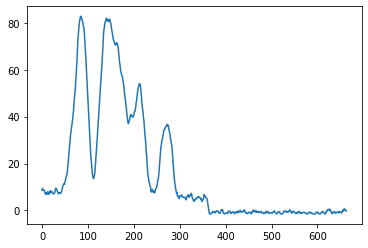

In [179]:
# Sliding window average

stack = []
max_stack_size = 5
smooth_curve = []
for datapoint in sig_data:
    stack.append(datapoint)
    if len(stack) > max_stack_size:
        stack = stack[1:]
    smooth_curve.append(np.mean(stack) - 1.5) # subtract mean value of noise

plt.plot(smooth_curve)

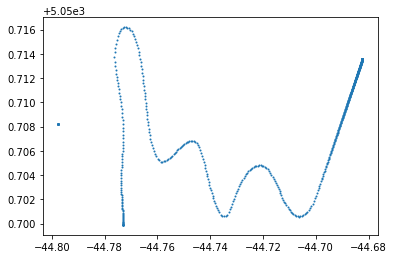

In [180]:
gps_data_N = [float(i.split(',')[2]) for i in gps_data]
gps_data_W = [float(i.split(',')[4]) for i in gps_data]

gps_data_N_1s = np.array([float(gps_data[i].split(',')[2]) for i in range(0, len(gps_data), 5)])
gps_data_W_1s = -1 * np.array([float(gps_data[i].split(',')[4]) for i in range(0, len(gps_data), 5)])

# for i in range(0, len(gps_data), 5):
#     gps_data_N_1s.append(gps_data_N[i])
#     gps_data_W_1s.append(gps_data_W[i])

plt.scatter(gps_data_W_1s, gps_data_N_1s, s=1)

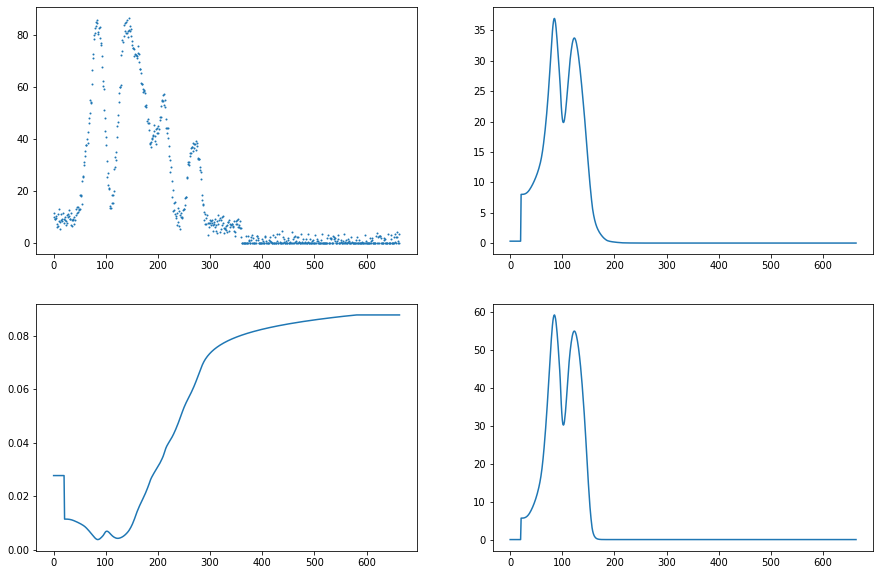

In [183]:

# A guess based on the graph
epicenter_horizontal = (-44.7, 0.0005+5050.7)
epicenter_vertical = (-0.0036-44.77, 0.04+5050.7)
epicenter_test = (-44.77, 0.711+5050)

epicenter = epicenter_test


def cartesian_distance(x1, y1, x2, y2):
    return (((x1-x2)**2 + (y1-y2)**2))**0.5


def distribution(d):
    return norm.pdf(d, 0, 0.005)


gps_data_WN_1s = zip(gps_data_W_1s, gps_data_N_1s)

gps_data_WN_distance = np.array([cartesian_distance(
    x1, y1, epicenter[0], epicenter[1]) for (x1, y1) in gps_data_WN_1s])

time = range(len(sig_data))
gps_data_WN_distance = gps_data_WN_distance[0: len(sig_data)]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(time, sig_data, s=1)

plt.subplot(2, 2, 3)
plt.plot(time, gps_data_WN_distance)

plt.subplot(2, 2, 2)
plt.plot(time, 80 * np.exp(-gps_data_WN_distance*200))

plt.subplot(2, 2, 4)
plt.plot(distribution(gps_data_WN_distance))


-44.587004